# Lecture 28 : GPU Handwritten Digit Classification

## Python imports and parameter settings

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import gzip
plt.rcParams['figure.figsize'] = [8,6]

## Clone the materials repo on github to access datafiles.

In [ ]:
!git clone https://github.com/jasonrwilson/cmda

Cloning into 'cmda'...
remote: Enumerating objects: 40, done.
remote: Counting objects: 100% (40/40), done.
remote: Compressing objects: 100% (39/39), done.
remote: Total 40 (delta 11), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (40/40), 30.67 MiB | 14.55 MiB/s, done.
Resolving deltas: 100% (11/11), done.


## Copy the MNIST files into our workspace.

In [ ]:
!cp cmda/*gz .
!gzip -d *gz
!cp cmda/*gz .

# Part 1 : The MNIST Dataset

## The MNIST Training Set

### The MNIST training set has 60000 separate images and class labels.

In [ ]:
# Opens MNIST training image set and stores it as a 60000 x 784 matrix
# There are 60000 images, each of which is 28 x 28 pixels
# Each image is stored as a 28x28 = 784 dimensional row vector in the matrix
f = gzip.open('train-images-idx3-ubyte.gz','r')
f.read(16) # skip file header
buf = f.read(60000*28*28)
data = np.frombuffer(buf,dtype=np.uint8)
train = data.reshape(60000,28*28).astype(np.int32)
print(train.shape)

(60000, 784)


In [ ]:
# Opening and saving the 60000 training labels
f = gzip.open('train-labels-idx1-ubyte.gz','r')
f.read(8) #skip header
buf = f.read(60000)
train_labels = np.frombuffer(buf,dtype=np.uint8)
print (train_labels.shape)

(60000,)


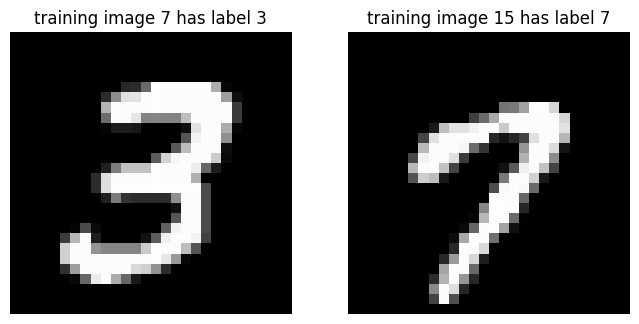

In [ ]:
# plot 2 training images with labels
train_1 = 7
train_2 = 15
f, axarr = plt.subplots(1,2)
image1 = train[train_1].reshape(28,28)
image2 = train[train_2].reshape(28,28)
axarr[0].imshow(image1,cmap='gray',vmin=0, vmax=255)
axarr[1].imshow(image2,cmap='gray',vmin=0, vmax=255)
axarr[0].set_title('training image '+str(train_1)+' has label '+str(train_labels[train_1]))
axarr[1].set_title('training image '+str(train_2)+' has label '+str(train_labels[train_2]))
axarr[0].axis('off')
axarr[1].axis('off');

## The MNIST Test Set

### To test how well our classifier *generalizes* we need to run it on *test data*.
### It is critical that our *test data* is *separate* from our *training data*.
### Fortunately there is a MNIST test set with 10000 separate images and class labels.

In [ ]:
# Opens MNIST test image set and stores it as a 10000 x 784 matrix
# There are 10000 images, each of which is 28 x 28 pixels
# Each image is stored as a 28x28 = 784 dimensional row vector in the matrix
f = gzip.open('t10k-images-idx3-ubyte.gz','r')
f.read(16) # skip header
buf = f.read(10000*28*28)
data = np.frombuffer(buf,dtype=np.uint8)
test = data.reshape(10000,28*28).astype(np.int32)
print(test.shape)

(10000, 784)


In [ ]:
#Opening and saving the 10000 test labels
f = gzip.open('t10k-labels-idx1-ubyte.gz','r')
f.read(8) #skip header
buf = f.read(10000)
test_labels = np.frombuffer(buf,dtype=np.uint8)
print (test_labels.shape)

(10000,)


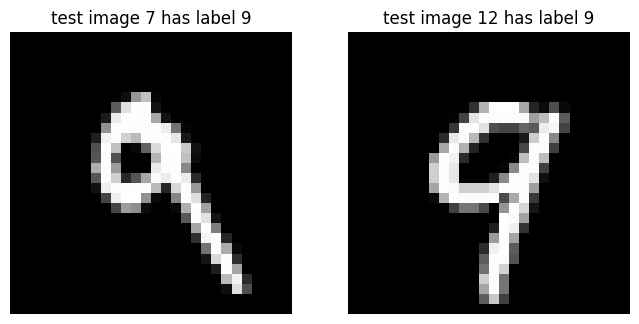

In [ ]:
# plot 2 test images with labels
test_1 = 7
test_2 = 12
f, axarr = plt.subplots(1,2)
image1 = test[test_1].reshape(28,28)
image2 = test[test_2].reshape(28,28)
axarr[0].imshow(image1,cmap='gray',vmin=0, vmax=255)
axarr[1].imshow(image2,cmap='gray',vmin=0, vmax=255)
axarr[0].set_title('test image '+str(test_1)+' has label '+str(test_labels[test_1]))
axarr[1].set_title('test image '+str(test_2)+' has label '+str(test_labels[test_2]))
axarr[0].axis('off')
axarr[1].axis('off');

# Part 2 : Nearest Neighbor Classification in Python

In [ ]:
# find the index of the training image closest to the test image with the given index
# note that we interpret the image data as 32 bit integers to avoid overflow
def nearest_train_index(train,test,test_index):
    min_dist_sq = np.inf
    for i in range(len(train)):
        diff = train[i]-test[test_index]
        dist_sq = np.dot(diff,diff)
        if (dist_sq < min_dist_sq):
            min_dist_sq = dist_sq
            nearest_train_index = i
    return nearest_train_index

CPU times: user 258 ms, sys: 1.46 ms, total: 260 ms
Wall time: 262 ms


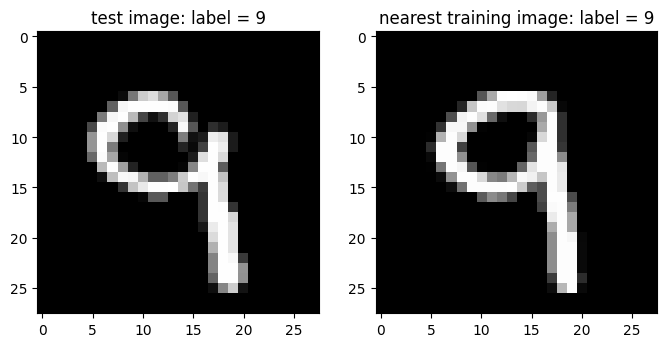

In [ ]:
%%time
test_index = 2342
train_index = nearest_train_index(train,test,test_index)
f, axarr = plt.subplots(1,2)
image1 = test[test_index].reshape(28,28)
image2 = train[train_index].reshape(28,28)
axarr[0].imshow(image1,cmap='gray',vmin=0, vmax=255)
axarr[1].imshow(image2,cmap='gray',vmin=0, vmax=255)
axarr[0].title.set_text('test image: label = '+str(test_labels[test_index]))
axarr[1].title.set_text('nearest training image: label = '+str(train_labels[train_index]))

## To classify a test image using nearest neighbor classification, we choose the class of the nearest training image.  

In [ ]:
%%time
# to find images that are classified incorrectly use range(1100,1120)
classify_errors = 0
test_start = 1100
num_test = 50
for test_index in range(test_start,test_start+num_test):
    train_index = nearest_train_index(train,test,test_index)
    if (test_labels[test_index] != train_labels[train_index]):
        classify_errors += 1
        print ('*',end="")
    print (test_index,train_index,test_labels[test_index],train_labels[train_index])
print ('number of digits classified incorrectly =',classify_errors)
print ('classificiation rate =',(num_test-classify_errors)/num_test)

1100 28011 7 7
1101 56286 8 8
1102 13591 5 5
1103 4811 9 9
1104 53783 7 7
1105 5669 9 9
1106 1504 6 6
*1107 26432 9 5
1108 5218 6 6
1109 25107 3 3
1110 48878 7 7
1111 48754 4 4
*1112 53009 4 6
1113 43459 5 5
*1114 50745 3 8
1115 47854 5 5
1116 590 4 4
1117 52791 7 7
1118 39608 8 8
1119 33057 7 7
1120 456 8 8
1121 48434 0 0
1122 4366 7 7
1123 18432 6 6
1124 19128 8 8
1125 19928 8 8
1126 53060 7 7
1127 53619 3 3
1128 21150 3 3
1129 10468 1 1
1130 25371 9 9
1131 44461 5 5
1132 26031 2 2
1133 25348 7 7
1134 39235 3 3
1135 4192 5 5
1136 54236 1 1
1137 33176 1 1
1138 45500 2 2
1139 25473 1 1
1140 7914 4 4
1141 55266 7 7
1142 24154 4 4
1143 52528 7 7
1144 15126 5 5
1145 29854 4 4
1146 5550 5 5
1147 19404 4 4
1148 47396 0 0
1149 23602 8 8
number of digits classified incorrectly = 3
classificiation rate = 0.94
CPU times: user 12.3 s, sys: 66.2 ms, total: 12.4 s
Wall time: 12.6 s


## Let's visualize a test image that the nearest neighbor classifier missed on.

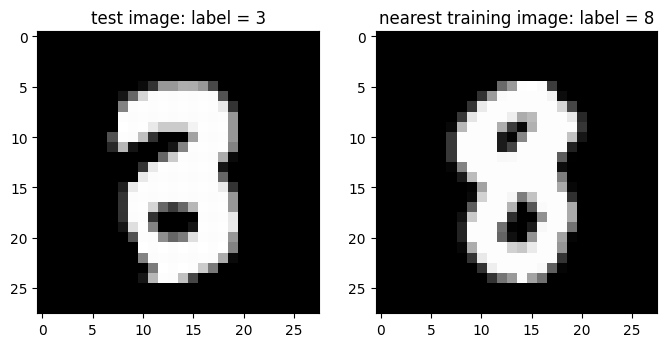

In [ ]:
test_index = 1114
train_index = nearest_train_index(train,test,test_index)
f, axarr = plt.subplots(1,2)
image1 = test[test_index].reshape(28,28)
image2 = train[train_index].reshape(28,28)
axarr[0].imshow(image1,cmap='gray',vmin=0, vmax=255)
axarr[1].imshow(image2,cmap='gray',vmin=0, vmax=255)
axarr[0].title.set_text('test image: label = '+str(test_labels[test_index]))
axarr[1].title.set_text('nearest training image: label = '+str(train_labels[train_index]))

## Notice that doing digit classification using nearest neighbor search is very slow in Python!

## Since it took around 12 seconds to classify 50 test images in Python it would take approximately

## $$(10000/50)*12 = 2400 \text{ seconds} = 40 \text{ minutes}$$

## to classify all 10000 test images in python.  


# Part 3 : Nearest Neighbor Classification in C

In [ ]:
%%writefile nearest.c
#include <stdio.h>
#include <stdlib.h>
#include <limits.h>
#include <time.h>

typedef unsigned char byte;

// calculates ||u-v||^2
int vec_dist_sq (byte u[], byte v[], int dim) {
    int dist_sq = 0;
    for (int i=0;i<dim;i++) {
        dist_sq += (u[i]-v[i])*(u[i]-v[i]);
    }
    return dist_sq;
}

// read byte data from a binary file
void read_bytes_bin (byte* data, int num_bytes, char* filename, int header_size) {
    byte header[header_size];
    FILE* fptr;
    int num_read;
    // open the binary file for reading
    fptr = fopen(filename,"rb");
    // need to check for null
    if (fptr == 0) {
        printf ("Error opening binary data file %s.\n",filename);
        exit(1);
    }
    // read header
    num_read = fread(header, sizeof(byte), header_size, fptr);
    // read data
    num_read = fread(data, sizeof(byte), num_bytes, fptr);
    if (num_read != num_bytes) {
        printf ("Warning : binary data file read error for %s.\n",filename);
    }
    // close the binary file
    fclose(fptr);
}

int main (int argc, char* argv[]) {

    int num_train = 60000;
    int num_test = 10000;
    int dim = 784;
    byte* train_bytes = (byte*)malloc(num_train*dim*sizeof(byte));
    byte* test_bytes = (byte*)malloc(num_test*dim*sizeof(byte));
    int* nearest = (int*)malloc(num_test*sizeof(int));
    byte* train_labels = (byte*)malloc(num_train*sizeof(byte));
    byte* test_labels = (byte*)malloc(num_test*sizeof(byte));
    char train_images_file[] = "train-images-idx3-ubyte";
    char train_labels_file[] = "train-labels-idx1-ubyte";
    char test_images_file[] = "t10k-images-idx3-ubyte";
    char test_labels_file[] = "t10k-labels-idx1-ubyte";
    read_bytes_bin(train_bytes,num_train*dim,train_images_file,16);
    read_bytes_bin(train_labels,num_train,train_labels_file,8);
    read_bytes_bin(test_bytes,num_test*dim,test_images_file,16);
    read_bytes_bin(test_labels,num_test,test_labels_file,8);

    // start timer
    clock_t begin = clock();

    // for each test vector find the nearest training vector
    for (int i=0;i<num_test;i++) {
        int min_dist_sq = INT_MAX;
        for (int j=0;j<num_train;j++) {
            int dist_sq = vec_dist_sq(test_bytes+i*dim,train_bytes+j*dim,dim);
            if (dist_sq < min_dist_sq) {
                min_dist_sq = dist_sq;
                nearest[i] = j;
            }
        }
    }

    // stop timer
    clock_t end = clock();
    double elapsed_time = (double)(end - begin) / CLOCKS_PER_SEC;

    // print results
    int classify_errors = 0;
    for (int i=0;i<num_test;i++) {
        if (test_labels[i] != train_labels[nearest[i]]) {
            classify_errors += 1;
        }
    }
    printf ("number of MNIST training images = %d\n",num_train);
    printf ("number of MNIST test images = %d\n",num_test);
    printf ("elapsed time = %.2f seconds\n",elapsed_time);
    printf ("number of classification errors = %d\n",classify_errors);
    printf ("classificiation rate = %.4f\n",1.0*(num_test-classify_errors)/num_test);

    // free dynamically allocated memory
    free (train_bytes);
    free (test_bytes);
    free (nearest);
    free (train_labels);
    free (test_labels);
}

Writing nearest.c


In [ ]:
!gcc -O3 -march=native -o nearest nearest.c

In [ ]:
!./nearest

number of MNIST training images = 60000
number of MNIST test images = 10000
elapsed time = 76.29 seconds
number of classification errors = 309
classificiation rate = 0.9691


## Note that it takes around 76 seconds to classify all 10000 test images in C.  

# Part 4 : Nearest Neighbor Search Using Matrix Multiplication

## Suppose we have *m* test images
## $$\text{test }= \{ \mathbf{v}_1, \mathbf{v}_2, \ldots, \mathbf{v}_m \}$$
## and *n* training images
## $$\text{training }= \{ \mathbf{w}_1, \mathbf{w}_2, \ldots, \mathbf{w}_n \}$$
## To do nearest neighbor classification:
## For each test image we need to find the nearest training image.  
## To do this we need to compute $mn$ distances squared:
## $$\| \mathbf{v}_i - \mathbf{w}_j \|^2 =
(\mathbf{v}_i - \mathbf{w}_j) \cdot
(\mathbf{v}_i - \mathbf{w}_j) =
\mathbf{v}_i \cdot \mathbf{v}_i - 2 \mathbf{v}_i \cdot \mathbf{w}_j + \mathbf{w}_j \cdot \mathbf{w}_j$$
## For $i$ in $1, \ldots, m$, the index of the training image nearest the test image $\mathbf{v}_i$ is:
### $$\text{argmin}_j \, \| \mathbf{v}_i - \mathbf{w}_j \|^2 = \text{argmin}_j \, (\mathbf{v}_i \cdot \mathbf{v}_i - 2 \mathbf{v}_i \cdot \mathbf{w}_j + \mathbf{w}_j \cdot \mathbf{w}_j) = \text{argmin}_j \,
(- 2 \mathbf{v}_i \cdot \mathbf{w}_j + \mathbf{w}_j \cdot \mathbf{w}_j)$$

## The majority of the work to be done is computing the $mn$ dot products
## $$\mathbf{v}_i \cdot \mathbf{w}_j$$
## The key observation is that we can turn computing those dot products into matrix multiplication.  
## $$\begin{bmatrix} \mathbf{v}_1^T \\ \mathbf{v}_2^T \\ \vdots \\ \mathbf{v}_m^T \end{bmatrix}
\begin{bmatrix} \mathbf{w}_1 & \mathbf{w}_2 & \cdots & \mathbf{w}_n \end{bmatrix} =
\begin{bmatrix} \mathbf{v}_1 \cdot \mathbf{w}_1 & \mathbf{v}_1 \cdot \mathbf{w}_2 & \cdots & \mathbf{v}_1 \cdot \mathbf{w}_n \\
\mathbf{v}_2 \cdot \mathbf{w}_1 & \mathbf{v}_2 \cdot \mathbf{w}_2 & \cdots & \mathbf{v}_2 \cdot \mathbf{w}_n \\ \vdots & \vdots & \ddots & \vdots
\\ \mathbf{v}_m \cdot \mathbf{w}_1 & \mathbf{v}_m \cdot \mathbf{w}_2 & \cdots & \mathbf{v}_m \cdot \mathbf{w}_n \end{bmatrix}$$


## In Python we see that it takes over 8 minutes just to multiply the test matrix and the training matrix (transposed)!

In [ ]:
%%time
num_test = 10000
testTrainProds = test[:num_test] @ train.T

CPU times: user 8min 14s, sys: 1.54 s, total: 8min 15s
Wall time: 8min 17s


In [ ]:
print (testTrainProds.shape)
print (testTrainProds)

(10000, 60000)
[[2023808 1785974  953124 ... 1325894  963727 1226750]
 [2063288 2271206  668321 ... 1353370 1594482 1579365]
 [1202123 1072343  201259 ...  528855  675934  777656]
 ...
 [2819210 2388116 1640192 ... 2374898 1839695 2311955]
 [2250953 2743129  892607 ... 1703791 2219113 2198611]
 [3344227 4926680 1508392 ... 2247176 4575574 2368378]]


## Fortunately, it is much simpler (and faster) to compute the dot product of each training image with itself!

In [ ]:
%%time
trainProds = np.sum(train*train,axis=1)
print (trainProds.shape)
print (trainProds)

(60000,)
[5940005 6750341 3853933 ... 4632710 3990452 4137450]
CPU times: user 82.9 ms, sys: 93.8 ms, total: 177 ms
Wall time: 178 ms


## For the final step we do a **argmin** reduction along the rows of the matrix with $i,j$ entry given by:
## $$A_{ij} = - 2 \mathbf{v}_i \cdot \mathbf{w}_j + \mathbf{w}_j \cdot \mathbf{w}_j$$

In [ ]:
%%time
nearest = np.argmin(-2*testTrainProds+trainProds,axis=1)
labels_diff = test_labels[:num_test] - train_labels[nearest]
classify_errors = np.count_nonzero(labels_diff)
print ('number of classification errors =',classify_errors)
print ('classificiation rate =',(num_test-classify_errors)/num_test)

number of classification errors = 309
classificiation rate = 0.9691
CPU times: user 2.2 s, sys: 10.4 s, total: 12.5 s
Wall time: 14.7 s


## We get the same answer classification rate on all 10000 test images as the previous C code!
## Adding up the runtimes of the three steps gives:
## $$\text{total runtime } = 497 + 0.178 + 14.7 \text{ seconds } \approx 8.5 \text{ minutes.}$$
## This is not bad for pure Python!  
## Note that there are no loops in the above Python code.
## This approach does however require a lot of memory.
## In fact, it is easy to run out of memory on Google Colab when trying out the above code!

# Part 5 : GPU Nearest Neighbor Classification using **cuBLAS**

## As above we can break down the nearest neighbor search into three major steps.  
# Step 1 : Compute the $mn$ dot products
# $$\mathbf{v}_i \cdot \mathbf{v}_j$$
# using matrix multiplication.
## We use the function **cublasSgemm** for this step.  
## Here **Sgemm** stands for single precision general matrix multiply.  
## This **cuBLAS** function allows us to take full advantage of the awesome number crunching capabilities of the GPU (including TensorCores!) without writing complicated CUDA kernels.
## Note that to use **cuBLAS** our matrices have to be stored in **column major order**.  
## It is typically much faster to work with matrices in **column major order** in CUDA because it allows **warps of threads** to access **consecutive memory locations**.  
# Step 2 : Compute the $n$ dot products
# $$\mathbf{w}_j \cdot \mathbf{w}_j$$
## For this step we use a kernel where each thread computes a single dot product.
# Step 3 : Do a **argmin** reduction along the rows of the matrix with $i,j$ entry given by:
# $$A_{ij} = - 2 \mathbf{v}_i \cdot \mathbf{w}_j + \mathbf{w}_j \cdot \mathbf{w}_j$$
## For this step we use a kernel where each thread does a single row reduction for a given $i$ (i.e. each thread handles finding the nearest neighbor of a single test image).  

In [ ]:
!git clone https://github.com/jasonrwilson/cmda

Cloning into 'cmda'...
remote: Enumerating objects: 40, done.
remote: Counting objects: 100% (40/40), done.
remote: Compressing objects: 100% (39/39), done.
remote: Total 40 (delta 11), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (40/40), 30.67 MiB | 21.78 MiB/s, done.
Resolving deltas: 100% (11/11), done.


In [ ]:
!cp cmda/*gz .
!gzip -d *gz

In [ ]:
%%writefile gpu_nearest.cu
#include <stdio.h>
#include <stdlib.h>
#include <float.h>
#include <cuda.h>
#include <cublas_v2.h>

typedef unsigned char byte;

// read byte data from a binary file
void read_bytes_bin (byte* data, int num_bytes, char* filename, int header_size) {
    byte header[header_size];
    FILE* fptr;
    int num_read;
    // open the binary file for reading
    fptr = fopen(filename,"rb");
    // need to check for null
    if (fptr == 0) {
        printf ("Error opening binary data file %s.\n",filename);
        exit(1);
    }
    // read header
    num_read = fread(header, sizeof(byte), header_size, fptr);
    // read data
    num_read = fread(data, sizeof(byte), num_bytes, fptr);
    if (num_read != num_bytes) {
        printf ("Warning : binary data file read error for %s.\n",filename);
    }
    // close the binary file
    fclose(fptr);
}

__global__ void trainDotProds (float *train, int num_train, int dim, float* dot_prods) {
    int t = blockIdx.x*blockDim.x + threadIdx.x;
    if (t < num_train) {
        float result = 0;
        for (int i=0;i<dim;i++) {
            float term = train[i*num_train+t];
            result += term*term;
        }
        dot_prods[t] = result;
    }
}

__global__ void calcNearest(float* train_dot_prods, int num_train,
        float* test_train_dot_prods, int num_test,
        int* nearest) {

    int t = blockIdx.x*blockDim.x + threadIdx.x;
    if (t < num_test) {
        float min_dist_sq = FLT_MAX;
        int nearest_idx;
        for (int i=0;i<num_train;i++) {
            float term1 = train_dot_prods[i];
            float term2 = test_train_dot_prods[i*num_test+t];
            float dist_sq = term1-2*term2;
            if (dist_sq < min_dist_sq) {
                min_dist_sq = dist_sq;
                nearest_idx = i;
            }
        }
        nearest[t] = nearest_idx;
    }
}

int main (int argc, char* argv[]) {

    int num_train = 60000;
    int num_test = 10000;
    int dim = 784;
    byte* train_bytes = (byte*)malloc(num_train*dim*sizeof(byte));
    byte* test_bytes = (byte*)malloc(num_test*dim*sizeof(byte));
    int* nearest = (int*)malloc(num_test*sizeof(int));
    byte* train_labels = (byte*)malloc(num_train*sizeof(byte));
    byte* test_labels = (byte*)malloc(num_test*sizeof(byte));
    char train_images_file[] = "train-images-idx3-ubyte-c";
    char train_labels_file[] = "train-labels-idx1-ubyte";
    char test_images_file[] = "t10k-images-idx3-ubyte-c";
    char test_labels_file[] = "t10k-labels-idx1-ubyte";
    read_bytes_bin(train_bytes,num_train*dim,train_images_file,16);
    read_bytes_bin(train_labels,num_train,train_labels_file,8);
    read_bytes_bin(test_bytes,num_test*dim,test_images_file,16);
    read_bytes_bin(test_labels,num_test,test_labels_file,8);

    // translate input data from byte to float matrices
    // good to work with floating point data in case we want to further
    // process the data (such as dimensionality reduction, etc.)
    float* test = (float*)malloc(num_test*dim*sizeof(float));
    for (int i=0;i<num_test*dim;i++) {
        test[i] = test_bytes[i];
    }
    float* train = (float*)malloc(num_train*dim*sizeof(float));
    for (int i=0;i<num_train*dim;i++) {
        train[i] = train_bytes[i];
    }

    // allocate device memory
    float* d_test;
    float* d_train;
    float* d_train_dot_prods;
    float* d_test_train_dot_prods;
    int* d_nearest;
    cudaMalloc(&d_test,num_test*dim*sizeof(float));
    cudaMalloc(&d_train,num_train*dim*sizeof(float));
    cudaMalloc(&d_train_dot_prods,num_train*sizeof(float));
    cudaMalloc(&d_test_train_dot_prods,num_test*num_train*sizeof(float));
    cudaMalloc(&d_nearest,num_test*sizeof(int));

    // copy data to device
    cudaMemcpy(d_test,test,num_test*dim*sizeof(float),cudaMemcpyHostToDevice);
    cudaMemcpy(d_train,train,num_train*dim*sizeof(float),cudaMemcpyHostToDevice);

    // setup CUBLAS
    float alpha = 1.0, beta = 0;
    cublasHandle_t handle;
    cublasCreate(&handle);
    cublasSetMathMode(handle, CUBLAS_TENSOR_OP_MATH);

    // for timing kernel execution
    cudaEvent_t tic, toc;
    cudaEventCreate(&tic);
    cudaEventCreate(&toc);
    cudaEventRecord(tic);

    // use CUBLAS to compute test/training dot products
    cublasSgemm(handle, CUBLAS_OP_N, CUBLAS_OP_T,
            num_test, num_train, dim, &alpha,
            d_test, num_test,
            d_train, num_train, &beta,
            d_test_train_dot_prods, num_test);

    // launch kernel to compute training dot products
    int B = 128;
    int G = (num_train+B-1)/B;
    trainDotProds <<< G, B >>> (d_train,num_train,dim,d_train_dot_prods);

    // launch kernel to compute nearest neighbors
    G = (num_test+B-1)/B;
    calcNearest <<< G, B >>>   (d_train_dot_prods, num_train,
            d_test_train_dot_prods, num_test,
            d_nearest);
    cudaEventRecord(toc);

    // copy nearest neighbor indices from device to host
    cudaMemcpy(nearest, d_nearest, num_test*sizeof(int),cudaMemcpyDeviceToHost);

    // calculate elapsed time
    cudaEventSynchronize(toc);
    float milliseconds = 0;
    cudaEventElapsedTime(&milliseconds, tic, toc);
    double elapsed_time = milliseconds/1000.0;

    // print results
    int classify_errors = 0;
    for (int i=0;i<num_test;i++) {
        if (test_labels[i] != train_labels[nearest[i]]) {
            classify_errors += 1;
        }
    }
    printf ("number of MNIST training images = %d\n",num_train);
    printf ("number of MNIST test images = %d\n",num_test);
    printf ("elapsed time = %.4f seconds\n",elapsed_time);
    printf ("number of classification errors = %d\n",classify_errors);
    printf ("classificiation rate = %.4f\n",1.0*(num_test-classify_errors)/num_test);

    // free dynamically allocated memory
    free (train_bytes);
    free (test_bytes);
    free (nearest);
    free (train_labels);
    free (test_labels);
    free (train);
    free (test);
    cudaFree(d_test);
    cudaFree(d_train);
    cudaFree(d_train_dot_prods);
    cudaFree(d_test_train_dot_prods);
    cudaFree(d_nearest);
}

Writing gpu_nearest.cu


In [ ]:
!nvcc -O3 -arch=sm_75 -o gpu_nearest gpu_nearest.cu -lcublas

In [ ]:
!./gpu_nearest

number of MNIST training images = 60000
number of MNIST test images = 10000
elapsed time = 0.1266 seconds
number of classification errors = 309
classificiation rate = 0.9691


## Note that it takes around an **eighth of a second** to classify 10000 test images on the T4 GPU when using cuBLAS for the large matrix multiplication.

## We can classify even faster using the more modern Nvidia V100 and Nvidia A100 gpus on ARC.  

## In fact, when using an A100 we can classify 10000 test images using **one million training images** in around a **quarter of a second**.  

## Note that the A100 was released in 2020.

## The Nvidia H100 is a GPU which was released in 2023 and offers nearly double the computation speed of the A100.

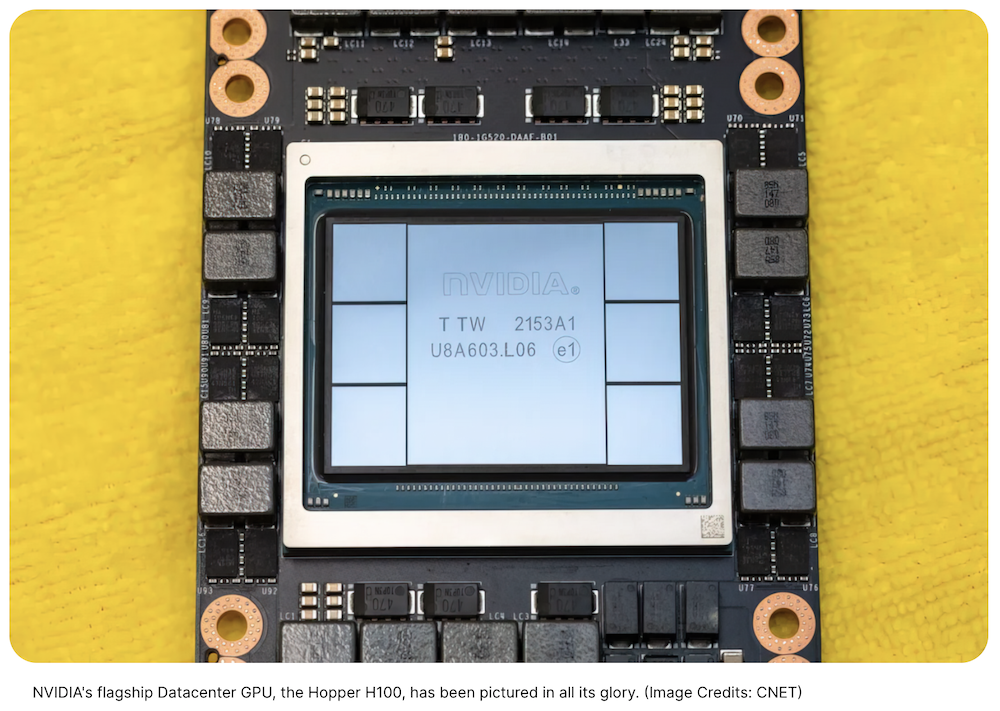